### O Ministério da Educação disponibiliza os microdados gerados por avaliações, pesquisas e exames em todo o Brasil onde os arquivos com os dados podem ser encontrados em: http://inep.gov.br/web/guest/microdados.  Estão disponíveis para consulta e download os microdados gerados por essas avaliações, pesquisas e exames.

### Como fonte de análise deste trabalho, usaremos os microdados do Enade 2018,
### Segundo o Inep, "o Exame Nacional de Desempenho dos Estudantes (Enade) avalia o rendimento dos concluintes dos cursos de graduação em relação aos conteúdos programáticos previstos nas diretrizes curriculares dos cursos, o desenvolvimento de competências e habilidades necessárias ao aprofundamento da formação geral e profissional, e o nível de atualização dos estudantes com relação à realidade brasileira e mundial." 

### O exame do Enade é dividido em três anos, assim o Enade é aplicado em categorias de cursos diferentes em cada um desses 3 anos, até voltar para a primeira catégoria.  

### O anos são divididos da seguinte forma:


## Ano I


### Cursos de bacharelado nas áreas de conhecimento de Ciências Agrárias, Ciências da Saúde e áreas afins;    
### Cursos de bacharelado nas áreas de conhecimento de Engenharias e Arquitetura e Urbanismo; 
### Cursos Superiores de Tecnologia nas áreas de Ambiente e Saúde, Produção Alimentícia, Recursos Naturais, Militar e Segurança.

## Ano II


###    Cursos de bacharelado nas áreas de conhecimento de Ciências Biológicas; Ciências Exatas e da Terra; Linguística, Letras e Artes e áreas afins;
### Cursos de licenciatura nas áreas de conhecimento de Ciências da Saúde; Ciências Humanas; Ciências Biológicas; Ciências Exatas e da Terra; Linguística, Letras e Artes;
### Cursos de bacharelado nas áreas de conhecimento de Ciências Humanas e Ciências da Saúde, com cursos avaliados no âmbito das licenciaturas;
### Cursos Superiores de Tecnologia nas áreas de Controle e Processos Industriais, Informação e Comunicação, Infraestrutura e Produção Industrial.

## Ano III


### Cursos de bacharelado nas Áreas de Conhecimento Ciências Sociais Aplicadas e áreas afins;
### Cursos de bacharelado nas Áreas de Conhecimento Ciências Humanas e áreas afins que não tenham cursos também avaliados no âmbito das licenciaturas;
### Cursos Superiores de Tecnologia nas áreas de Gestão e Negócios, Apoio Escolar, Hospitalidade e Lazer, Produção Cultural e Design.



### Este trabalho trabalhará em cima dos dados relativos ao ano de 2018, que se enquadra no ano III. 

# Importação do Dataset ENADE 2018

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
name_path_csv = "DADOS_ENADE_2018/dataset_enade"
arquivo = open(name_path_csv)
df = pd.read_csv(arquivo, delimiter=";")
df['NT_GER'] = [str(val).replace(',', '.') for val in df['NT_GER']]
#cria a coluna Notas convertendo para numerico
df['Notas']=pd.to_numeric(df.NT_GER,errors='coerce')

# Exploração do Dataset

### Número de Linhas e Colunas

In [4]:
print("Número de Linhas e Colunas",df.shape)

Número de Linhas e Colunas (99999, 138)


### Cabeçalho do Dataset

In [5]:
df.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,Notas
0,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,42.8
1,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,59.3
2,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,60.9
3,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,4.0,25.0
4,2018,1356,10003,10020,1,47116,1,3546603,35,3,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,42.4


### Colunas do Dataset

In [6]:
df.columns.values

array(['NU_ANO', 'CO_IES', 'CO_CATEGAD', 'CO_ORGACAD', 'CO_GRUPO',
       'CO_CURSO', 'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_UF_CURSO',
       'CO_REGIAO_CURSO', 'NU_IDADE', 'TP_SEXO', 'ANO_FIM_EM',
       'ANO_IN_GRAD', 'CO_TURNO_GRADUACAO', 'TP_INSCRICAO_ADM',
       'TP_INSCRICAO', 'NU_ITEM_OFG', 'NU_ITEM_OFG_Z', 'NU_ITEM_OFG_X',
       'NU_ITEM_OFG_N', 'NU_ITEM_OCE', 'NU_ITEM_OCE_Z', 'NU_ITEM_OCE_X',
       'NU_ITEM_OCE_N', 'DS_VT_GAB_OFG_ORIG', 'DS_VT_GAB_OFG_FIN',
       'DS_VT_GAB_OCE_ORIG', 'DS_VT_GAB_OCE_FIN', 'DS_VT_ESC_OFG',
       'DS_VT_ACE_OFG', 'DS_VT_ESC_OCE', 'DS_VT_ACE_OCE', 'TP_PRES',
       'TP_PR_GER', 'TP_PR_OB_FG', 'TP_PR_DI_FG', 'TP_PR_OB_CE',
       'TP_PR_DI_CE', 'TP_SFG_D1', 'TP_SFG_D2', 'TP_SCE_D1', 'TP_SCE_D2',
       'TP_SCE_D3', 'NT_GER', 'NT_FG', 'NT_OBJ_FG', 'NT_DIS_FG',
       'NT_FG_D1', 'NT_FG_D1_PT', 'NT_FG_D1_CT', 'NT_FG_D2',
       'NT_FG_D2_PT', 'NT_FG_D2_CT', 'NT_CE', 'NT_OBJ_CE', 'NT_DIS_CE',
       'NT_CE_D1', 'NT_CE_D2', 'NT_CE_D3', 'CO_RS_I1

## O dataset do Enade tem 135 colunas divididos em 9 partes, são elas:
### parte 1 - informações da instituição de ensino superior e do curso.s
### parte 2 - informações do estudante.
### parte 3 - número de questões da parte objetiva em formação geral e componente específico.
### parte 4 - vetores de gabarito.
### parte 5 - tipos de presença.
### parte 6 - tipos de situação das questões da parte discursiva.
### parte 7 - notas na formação geral e componente específico.
### parte 8 - questionário de percepção da prova.
### parte 9 - questionário do estudante.

## Dessa forma o dataset foi considero bem completo e com ampla espaço para diversos tipos de pesquisas e objetivos. 

###  Imprimir os tipos do Dataset

In [6]:
df.dtypes

NU_ANO                  int64
CO_IES                  int64
CO_CATEGAD              int64
CO_ORGACAD              int64
CO_GRUPO                int64
CO_CURSO                int64
CO_MODALIDADE           int64
CO_MUNIC_CURSO          int64
CO_UF_CURSO             int64
CO_REGIAO_CURSO         int64
NU_IDADE                int64
TP_SEXO                object
ANO_FIM_EM              int64
ANO_IN_GRAD             int64
CO_TURNO_GRADUACAO      int64
TP_INSCRICAO_ADM        int64
TP_INSCRICAO            int64
NU_ITEM_OFG             int64
NU_ITEM_OFG_Z           int64
NU_ITEM_OFG_X           int64
NU_ITEM_OFG_N           int64
NU_ITEM_OCE             int64
NU_ITEM_OCE_Z           int64
NU_ITEM_OCE_X           int64
NU_ITEM_OCE_N           int64
DS_VT_GAB_OFG_ORIG     object
DS_VT_GAB_OFG_FIN      object
DS_VT_GAB_OCE_ORIG     object
DS_VT_GAB_OCE_FIN      object
DS_VT_ESC_OFG          object
                       ...   
QE_I40                float64
QE_I41                float64
QE_I42    

### Missing Values

In [7]:
print("Percentual de Valores Nulos")
print(100*(df.isnull().sum()/len(df)))

Percentual de Valores Nulos
NU_ANO                 0.000000
CO_IES                 0.000000
CO_CATEGAD             0.000000
CO_ORGACAD             0.000000
CO_GRUPO               0.000000
CO_CURSO               0.000000
CO_MODALIDADE          0.000000
CO_MUNIC_CURSO         0.000000
CO_UF_CURSO            0.000000
CO_REGIAO_CURSO        0.000000
NU_IDADE               0.000000
TP_SEXO                0.000000
ANO_FIM_EM             0.000000
ANO_IN_GRAD            0.000000
CO_TURNO_GRADUACAO     0.000000
TP_INSCRICAO_ADM       0.000000
TP_INSCRICAO           0.000000
NU_ITEM_OFG            0.000000
NU_ITEM_OFG_Z          0.000000
NU_ITEM_OFG_X          0.000000
NU_ITEM_OFG_N          0.000000
NU_ITEM_OCE            0.000000
NU_ITEM_OCE_Z          0.000000
NU_ITEM_OCE_X          0.000000
NU_ITEM_OCE_N          0.000000
DS_VT_GAB_OFG_ORIG     0.000000
DS_VT_GAB_OFG_FIN      0.000000
DS_VT_GAB_OCE_ORIG     0.000000
DS_VT_GAB_OCE_FIN      0.000000
DS_VT_ESC_OFG         12.237122
            

# Cálculo de Nota versus Sexo

In [7]:
# Converte de virgula para ponto
df['NT_GER'] = [str(val).replace(',', '.') for val in df['NT_GER']]
#cria a coluna Notas convertendo para numerico
df['Notas']=pd.to_numeric(df.NT_GER,errors='coerce')

# Filtra os dados necessários
NotasSexo=df.loc[:,["TP_SEXO","Notas"]]

# Faz o Agrupamento
Media=NotasSexo.groupby('TP_SEXO')['Notas'].mean()
Desvio=NotasSexo.groupby('TP_SEXO')['Notas'].std()
print("Media de Notas",Media)
print("Desvio de Notas",Desvio)


Media de Notas TP_SEXO
F    41.177415
M    42.557291
Name: Notas, dtype: float64
Desvio de Notas TP_SEXO
F    14.247662
M    14.769464
Name: Notas, dtype: float64


## Gráfico Notas versus Sexo

Text(0, 0.5, 'Notas')

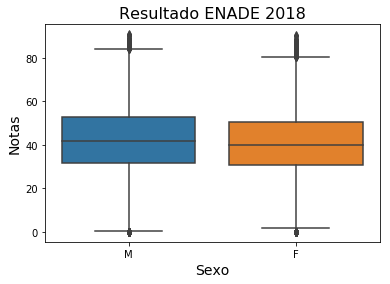

In [9]:
import seaborn as sns
%matplotlib inline
bplot=sns.boxplot(x='TP_SEXO',y='Notas', data=NotasSexo)
bplot.axes.set_title("Resultado ENADE 2018",fontsize=16)
bplot.set_xlabel("Sexo",fontsize=14)
bplot.set_ylabel("Notas",fontsize=14)


#### O resultado médio entre homens e mulheres são quase que similares, tanto na media quando no desvio pados das notas. Os homens tem resultado médio em: 42.55 e desvio padrão em: 14.76. As mulheres tem resultado médio em: 41.17 e desvio padrão em: 14.24

#### Podemos definir então que puramente o sexo não é um determinador de desempenho durante a graduação e consequêntemente no Enade.   

# Notas por Renda Familiar

In [10]:
# Filtra os dados necessários
RendaFamiliar=df.loc[:,["QE_I08","Notas"]]

Media=RendaFamiliar.groupby('QE_I08')['Notas'].mean()
Desvio=RendaFamiliar.groupby('QE_I08')['Notas'].std()

print("Media de Notas",Media)
print("Desvio de Notas",Desvio)

Media de Notas QE_I08
A    39.153890
B    39.838172
C    41.163529
D    43.263833
E    45.435685
F    48.488506
G    48.632532
Name: Notas, dtype: float64
Desvio de Notas QE_I08
A    14.077651
B    13.599200
C    13.892604
D    14.428556
E    14.942968
F    15.663728
G    16.288611
Name: Notas, dtype: float64


In [13]:
import seaborn as sns
%matplotlib inline

### Guafico de Pizza da quantidade de alunos por categoria, em determinada variável 

In [14]:

def qtd_alunos_por_categoria(var_media,var_analisada):
    #alunos = df[df[var_media] >= 0]
    alunos = df
    alunos[var_analisada].value_counts().plot.pie(title=var_analisada)
    print(alunos[var_analisada].value_counts())

### Média e desvio padrão das notas dos alunos

In [15]:
def Media_e_desvio(var_analisada,opcoes_escolhidas):
    Media=opcoes_escolhidas.groupby(var_analisada)['Notas'].mean()
    Desvio=opcoes_escolhidas.groupby(var_analisada)['Notas'].std()
    print("Media de Notas",Media)
    print("Desvio de Notas",Desvio)

### Boxplot das notas

In [16]:
def notas_medias_na_variavel(var_analisada,opcoes_escolhidas):
    # Determine the order of boxes
    order = opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index
    bplot=sns.boxplot(x=var_analisada,y='Notas', data=opcoes_escolhidas,order=order)
    bplot.axes.set_title(str(var_analisada)+" versus Nota ",fontsize=16)
    bplot.set_xlabel("Opçoes",fontsize=14)
    bplot.set_ylabel("Notas",fontsize=14)

B    25479
C    20715
A    17066
D    10635
E    10616
F     6080
G     1229
Name: QE_I08, dtype: int64


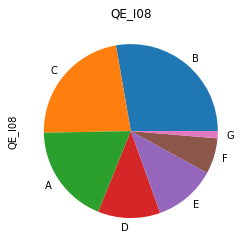

In [17]:
var_analisada = 'QE_I08' # Renda total da família, incluindo rendimentos do aluno:
#A = Até 1,5 salário mínimo (até R$ 1.431,00).
#B = De 1,5 a 3 salários mínimos (R$ 1.431,01 a R$ 2.862,00).
#C = De 3 a 4,5 salários mínimos (R$ 2.862,01 a R$ 4.293,00).
#D = De 4,5 a 6 salários mínimos (R$ 4.293,01 a R$ 5.724,00).
#E = De 6 a 10 salários mínimos (R$ 5.724,01 a R$ 9.540,00).
#F = De 10 a 30 salários mínimos (R$ 9.540,01 a R$ 28.620,00).
#G = Acima de 30 salários mínimos (mais de R$ 28.620,00).

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I08
A    39.153890
B    39.838172
C    41.163529
D    43.263833
E    45.435685
F    48.488506
G    48.632532
Name: Notas, dtype: float64
Desvio de Notas QE_I08
A    14.077651
B    13.599200
C    13.892604
D    14.428556
E    14.942968
F    15.663728
G    16.288611
Name: Notas, dtype: float64


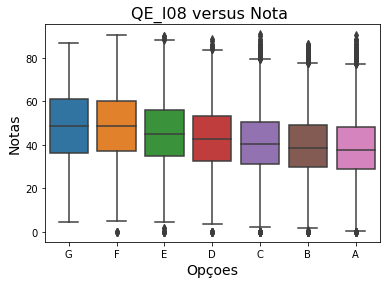

In [18]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

#### É observado pelos dados e pelo gráfico de Pizza, que grande partes dos estudantes se encontram em fámilias que recebem até 4,5 salários minimos, do outro ládo comparando com o montante de todos os estudantes, os que as famílias que recebem à partir de 10 salários mínimos são pouquissimos.
#### Com a análise desses indeces, concluimos previamente que quando a renda familiar dos estudantes são maiores, eles dentem a tirar notas mais altas do que estudantes que tem a renda familiar mais baixa. Outra observação é que há grande disparidade da nota média entre alunos com renda familiar superior à 10 salários mínimos dos estudantes com renda familiar inferior à 3 salários mínimos. Essa disparidade é de 48.63 para 39.83 respectivamente, assim a diverença na nota média é de 8,65 .

A    65275
B    20144
E     3275
C     2861
D      264
Name: QE_I01, dtype: int64


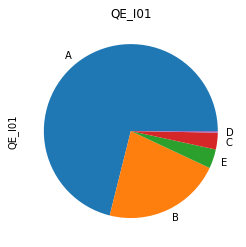

In [19]:
var_analisada = 'QE_I01' #Qual o seu estado civil?
#A = Solteiro(a).
#B = Casado(a).
#C = Separado(a) judicialmente/divorciado(a).
#D = Viúvo(a).
#E = Outro.

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I01
A    42.450254
B    40.088819
C    39.270104
D    38.208678
E    40.036476
Name: Notas, dtype: float64
Desvio de Notas QE_I01
A    14.744246
B    13.627886
C    13.256325
D    13.336530
E    13.547528
Name: Notas, dtype: float64


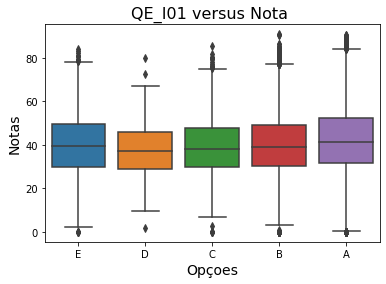

In [20]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

In [21]:
### Pré análise: Grande parte dos estudantes são solteiros, 

B    50274
C    27292
A     9256
D     4211
F      562
E      225
Name: QE_I06, dtype: int64


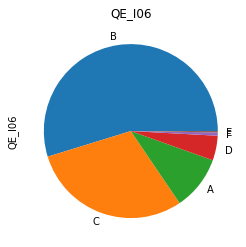

In [22]:
var_analisada = "QE_I06" #Onde e com quem mora atualmente: 
#A = Em casa ou apartamento, sozinho.
#B = Em casa ou apartamento, com pais e/ou parentes.
#C = Em casa ou apartamento, com cônjuge e/ou filhos.
#D = Em casa ou apartamento, com outras pessoas (incluindo república).
#E = Em alojamento universitário da própria instituição.
#F = Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I06
A    41.480485
B    42.325446
C    39.829911
D    46.964562
E    47.859070
F    43.602099
Name: Notas, dtype: float64
Desvio de Notas QE_I06
A    14.938539
B    14.555978
C    13.576838
D    15.471648
E    16.434000
F    16.026716
Name: Notas, dtype: float64


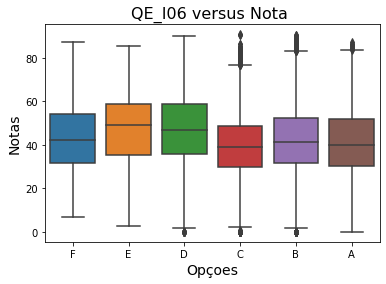

In [23]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

3    37151
4    30548
2    21424
5     6110
1     4766
Name: CO_REGIAO_CURSO, dtype: int64


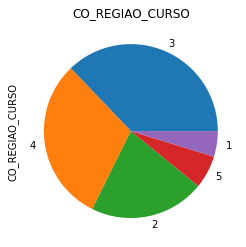

In [24]:
var_analisada = "CO_REGIAO_CURSO" # Região de do curso: 1 = Norte 2 = Nordeste 3 = Sudeste 4 = Sul 5 = Centro-Oeste
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_REGIAO_CURSO
1    40.457156
2    41.823026
3    42.969833
4    40.347581
5    41.451084
Name: Notas, dtype: float64
Desvio de Notas CO_REGIAO_CURSO
1    13.815488
2    14.594877
3    14.683601
4    13.932304
5    15.129636
Name: Notas, dtype: float64


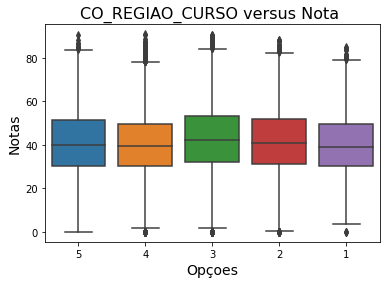

In [25]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

35    21586
41    16340
31     8823
42     8324
43     5884
33     4805
26     3999
24     3752
29     3616
22     2640
15     2614
25     2513
52     2155
23     1966
32     1937
53     1763
51     1734
21     1381
27     1073
13      616
17      543
28      484
11      466
50      458
16      295
14      151
12       81
Name: CO_UF_CURSO, dtype: int64


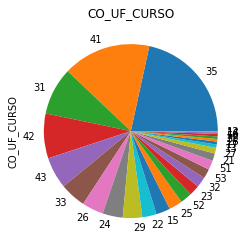

In [26]:
var_analisada = "CO_UF_CURSO" # Código da UF de funcionamento do curso:
#11 = Rondônia (RO) 
#12 = Acre (AC) 
#13 = Amazonas (AM)
#14 = Roraima (RR)
#15 = Pará (PA)
#16 = Amapa (AP)
#17 = Tocantins (TO)
#21 = Maranhão (MA)
#22= Piauí (PI)
#23 = Ceará (CE)
#24 = Rio Grande do Norte (RN)
#25 = Paraíba (PB)
#26 = Pernambuco (PE)
#27 = Alagoas (AL)
#28 = Sergipe (SE)
#29 = Bahia (BA)
#31 = Minas gerais (MG)
#32 = Espírito Santo (ES)
#33 = Rio de Janeiro (RJ)
#35 = São Paulo (SP)
#41 = Paraná (PR)
#42 = Santa Catarina (SC)
#43 = Rio Grande do Sul (RS)
#50 = Mato Grosso do Sul (MS)
#51 = Mato Grosso (MT)
#52 = Goiás (GO)
#53 = Distrito federal (DF)

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_UF_CURSO
11    41.938375
12    51.971186
13    38.839450
14    44.466667
15    41.163741
16    39.076296
17    35.930247
21    42.711436
22    39.011516
23    46.198820
24    42.296992
25    41.005943
26    40.078470
27    41.371318
28    50.190330
29    42.074142
31    44.736558
32    44.447574
33    45.328365
35    41.544666
41    40.480554
42    38.201202
43    42.871584
50    44.087317
51    40.099358
52    37.499898
53    47.375051
Name: Notas, dtype: float64
Desvio de Notas CO_UF_CURSO
11    13.488724
12    15.057980
13    12.220443
14    15.149336
15    14.211466
16    13.787307
17    11.521926
21    13.893480
22    13.565359
23    14.951703
24    14.655460
25    13.817280
26    14.236081
27    14.509382
28    15.752808
29    15.046516
31    15.283246
32    13.977836
33    15.412864
35    14.146032
41    13.995035
42    13.153293
43    14.327199
50    14.340214
51    13.885531
52    13.616728
53    16.488359
Name: Notas, dtype: float64


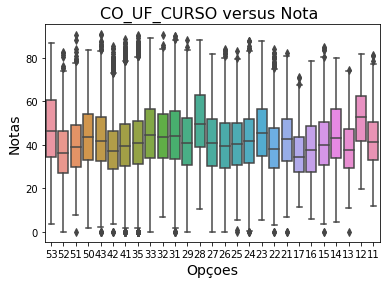

In [27]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

4    76700
1    13701
3     6346
2     3252
Name: CO_TURNO_GRADUACAO, dtype: int64


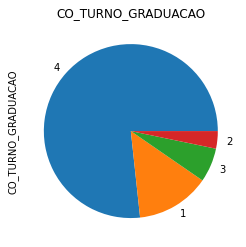

In [28]:
var_analisada = "CO_TURNO_GRADUACAO" # turno de graduação: 1 = Matutino 2 = Vespertino 3 = Integral 4 = Noturno
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_TURNO_GRADUACAO
1    46.104381
2    44.871419
3    49.202747
4    40.171939
Name: Notas, dtype: float64
Desvio de Notas CO_TURNO_GRADUACAO
1    14.949839
2    15.339403
3    16.030090
4    13.818364
Name: Notas, dtype: float64


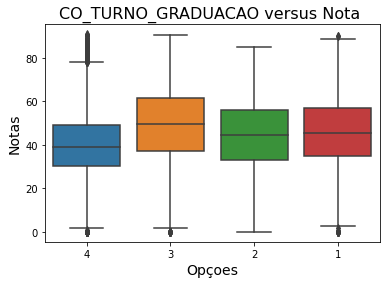

In [29]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    51022
D    28777
B     7926
C     2108
F     1716
E      271
Name: QE_I02, dtype: int64


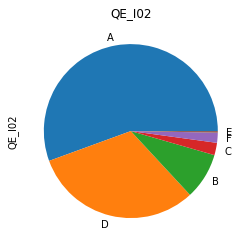

In [30]:
var_analisada= "QE_I02" # Estado civil: 
#A = Branca.
#B = Preta.
#C = Amarela.
#D = Parda.
#E = Indígena.
#F = Não quero declarar.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I02
A    42.470909
B    41.591146
C    40.183550
D    40.470690
E    38.161847
F    44.615068
Name: Notas, dtype: float64
Desvio de Notas QE_I02
A    14.615975
B    14.365777
C    14.265447
D    14.069103
E    13.824039
F    15.289009
Name: Notas, dtype: float64


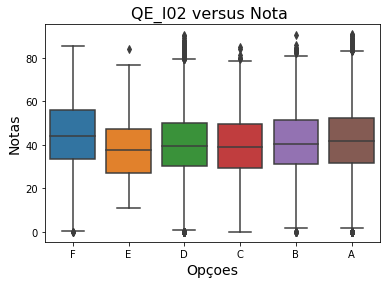

In [31]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    90949
B      636
C      235
Name: QE_I03, dtype: int64


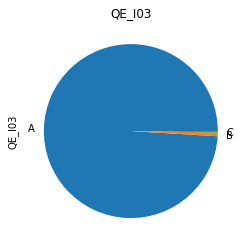

In [32]:

var_analisada= "QE_I03" # Nacionalidade: 
#A = Brasileira.
#B = Brasileira naturalizada.
#C = Estrangeira.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I03
A    41.795643
B    35.524550
C    38.109955
Name: Notas, dtype: float64
Desvio de Notas QE_I03
A    14.465024
B    12.667032
C    14.385757
Name: Notas, dtype: float64


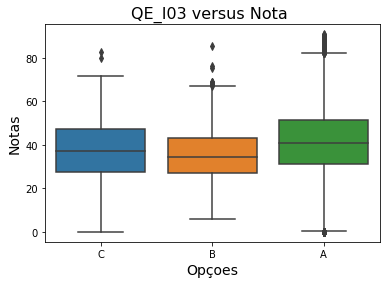

In [33]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

D    28237
B    26113
C    14387
E    12024
A     6977
F     4082
Name: QE_I04, dtype: int64


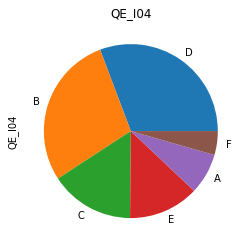

In [34]:
var_analisada= "QE_I04" # Etapa de escolarização que o pai concluiu:
#A = Nenhuma.
#B = Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série).
#C = Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série).
#D = Ensino Médio.
#E = Ensino Superior - Graduação.
#F = Pós-graduação.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I04
A    39.505549
B    39.396657
C    41.074661
D    42.371717
E    44.886498
F    49.369529
Name: Notas, dtype: float64
Desvio de Notas QE_I04
A    13.885335
B    13.466788
C    13.773247
D    14.519822
E    15.442141
F    15.887192
Name: Notas, dtype: float64


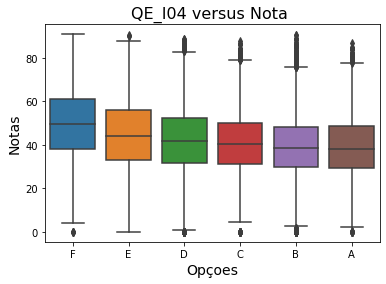

In [35]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

D    29868
B    22277
C    14170
E    12958
F     7531
A     5016
Name: QE_I05, dtype: int64


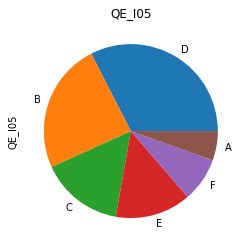

In [36]:
var_analisada= "QE_I05" # Etapa de escolarização a mãe concluiu:
#A = Nenhuma.
#B = Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série).
#C = Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série).
#D = Ensino Médio.
#E = Ensino Superior - Graduação.
#F = Pós-graduação.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I05
A    39.098704
B    39.242832
C    40.774956
D    42.016109
E    44.639985
F    46.630687
Name: Notas, dtype: float64
Desvio de Notas QE_I05
A    14.194589
B    13.376677
C    13.700016
D    14.452265
E    15.225239
F    15.599658
Name: Notas, dtype: float64


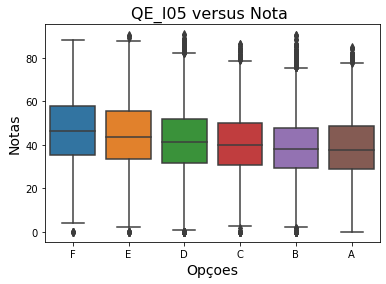

In [37]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

C    25162
B    20458
E    19249
D    12364
F     8579
A     6008
Name: QE_I09, dtype: int64


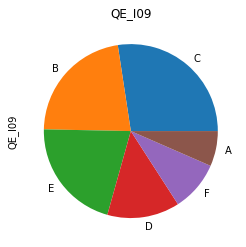

In [38]:
var_analisada= "QE_I09" # alternativa que melhor descreve a situação financeira (incluindo bolsas):
#A = Não tenho renda e meus gastos são financiados por programas governamentais.
#B = Não tenho renda e meus gastos são financiados pela minha família ou por outras pessoas.
#C = Tenho renda, mas recebo ajuda da família ou de outras pessoas para financiar meus gastos.
#D = Tenho renda e não preciso de ajuda para financiar meus gastos.
#E = Tenho renda e contribuo com o sustento da família.
#F = Sou o principal responsável pelo sustento da família.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]

qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I09
A    41.140197
B    43.175379
C    42.976305
D    40.601265
E    39.781999
F    41.056020
Name: Notas, dtype: float64
Desvio de Notas QE_I09
A    14.530910
B    14.915019
C    14.781982
D    14.119862
E    13.622588
F    13.941294
Name: Notas, dtype: float64


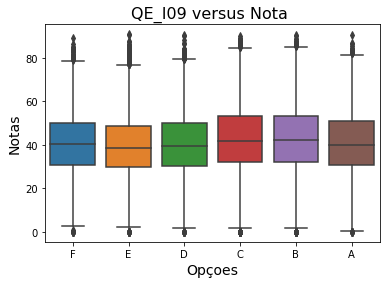

In [39]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

E    40203
A    31340
D     9865
B     5292
C     5120
Name: QE_I10, dtype: int64


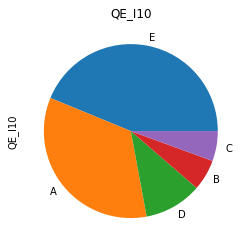

In [40]:
var_analisada= "QE_I10" # Alternativa que melhor descreve a situação de trabalho (exceto estágio ou bolsas):
#A = Não estou trabalhando.
#B = Trabalho eventualmente.
#C = Trabalho até 20 horas semanais.
#D = Trabalho de 21 a 39 horas semanais.
#E = Trabalho 40 horas semanais ou mais.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I10
A    43.804008
B    40.910467
C    41.853134
D    43.034771
E    39.887590
Name: Notas, dtype: float64
Desvio de Notas QE_I10
A    15.070376
B    15.045781
C    14.929271
D    14.610948
E    13.514567
Name: Notas, dtype: float64


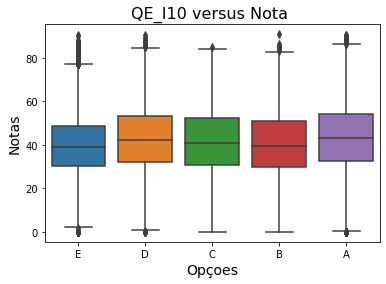

In [41]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

B    32727
A    17879
E    15495
H     8151
C     6563
I     3207
G     2746
D     2148
J     1531
F      915
K      458
Name: QE_I11, dtype: int64


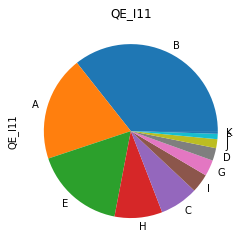

In [42]:
var_analisada= "QE_I11" # Tipo de bolsa de estudos ou financiamento do curso recebido para custear todas ou a 
#maior parte das mensalidades. No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração:
#A = Nenhum, pois meu curso é gratuito.
#B = Nenhum, embora meu curso não seja gratuito.
#C = ProUni integral.
#D = ProUni parcial, apenas.
#E = FIES, apenas.
#F = ProUni Parcial e FIES.
#G = Bolsa oferecida por governo estadual, distrital ou municipal.
#H = Bolsa oferecida pela própria instituição.
#I = Bolsa oferecida por outra entidade (empresa, ONG, outra).
#J = Financiamento oferecido pela própria instituição.
#K = Financiamento bancário.
opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I11
A    48.516081
B    39.597884
C    46.472357
D    42.168087
E    38.411231
F    41.255530
G    38.105674
H    41.005991
I    40.310671
J    37.572990
K    35.416092
Name: Notas, dtype: float64
Desvio de Notas QE_I11
A    15.653123
B    13.824242
C    13.393812
D    12.754913
E    12.904150
F    13.022479
G    12.569100
H    14.026416
I    13.356955
J    12.805738
K    13.725650
Name: Notas, dtype: float64


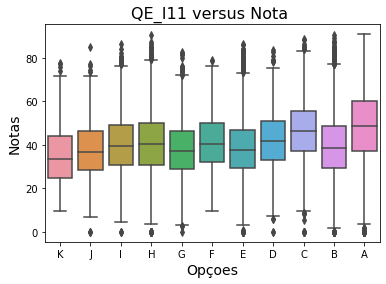

In [43]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

10005    28381
10008    26109
118      16474
10002     9647
10001     4465
115       3513
10003     3351
10007     2907
121       2788
93         830
116        440
10006      426
10009      327
120        270
17634       71
Name: CO_CATEGAD, dtype: int64


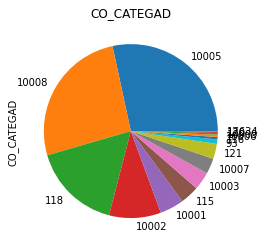

In [44]:
var_analisada= "CO_CATEGAD" # Código da categoria administrativa da instituição:
#1 = Pública Federal
#2 = Pública Estadual
#3 = Pública Municipal
#4 = Privada com fins lucrativos
#5 = Privada sem fins lucrativos
#7 = Especial

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas CO_CATEGAD
93       49.972654
115      47.784568
116      41.993382
118      39.511059
120      41.317355
121      40.174811
10001    45.921585
10002    51.230933
10003    40.282095
10005    39.018688
10006    47.829457
10007    43.568013
10008    40.847813
10009    38.375085
17634    36.422581
Name: Notas, dtype: float64
Desvio de Notas CO_CATEGAD
93       14.459630
115      14.933033
116      14.030265
118      13.312769
120      13.364617
121      13.059835
10001    15.270728
10002    15.671202
10003    14.051310
10005    13.246831
10006    13.750126
10007    14.770273
10008    14.027453
10009    13.517233
17634    11.614779
Name: Notas, dtype: float64


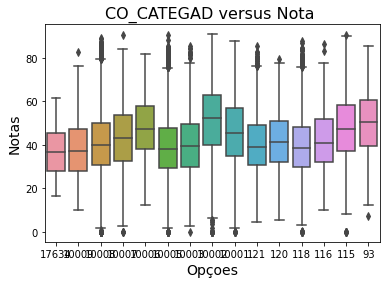

In [45]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    63300
B    20217
D     4484
E     3486
F      236
C       97
Name: QE_I17, dtype: int64


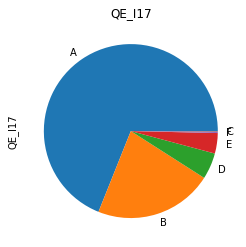

In [46]:
var_analisada= "QE_I17" # tipo de escola que cursou no ensino médio?
#A = Todo em escola pública.
#B = Todo em escola privada (particular).
#C = Todo no exterior.
#D = A maior parte em escola pública.
#E = A maior parte em escola privada (particular).
#F = Parte no Brasil e parte no exterior.

opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I17
A    40.249339
B    46.855068
C    41.289011
D    39.440942
E    41.646476
F    48.517352
Name: Notas, dtype: float64
Desvio de Notas QE_I17
A    13.814311
B    15.316615
C    16.633577
D    13.799776
E    14.539076
F    16.366364
Name: Notas, dtype: float64


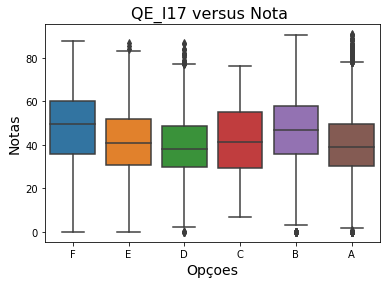

In [47]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

D    22385
C    22133
B    15387
E    12345
A    11459
F     5093
G     1756
H     1262
Name: QE_I07, dtype: int64


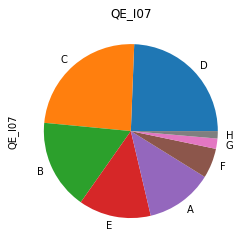

In [49]:
var_analisada= "QE_I07" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I07
A    43.829044
B    41.874078
C    41.737032
D    42.042381
E    40.787813
F    39.386952
G    38.908848
H    39.037031
Name: Notas, dtype: float64
Desvio de Notas QE_I07
A    15.434187
B    14.422011
C    14.331927
D    14.438295
E    14.018106
F    13.818615
G    13.579796
H    13.654408
Name: Notas, dtype: float64


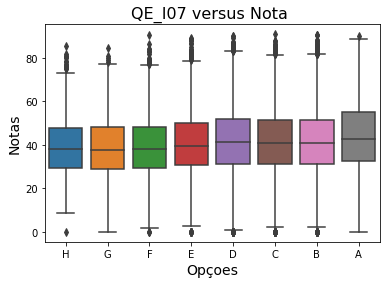

In [50]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    87298
F     1649
E     1295
C      865
D      382
B      331
Name: QE_I12, dtype: int64


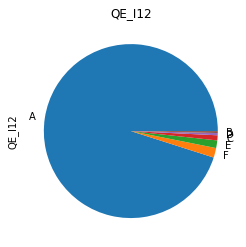

In [51]:
var_analisada= "QE_I12" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I12
A    41.531589
B    47.876899
C    48.499392
D    45.292157
E    48.330656
F    42.211352
Name: Notas, dtype: float64
Desvio de Notas QE_I12
A    14.381832
B    15.295023
C    15.514613
D    15.656457
E    15.787109
F    14.255900
Name: Notas, dtype: float64


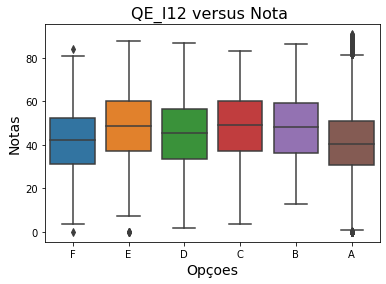

In [52]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    80338
F     5711
B     2496
C     1597
D     1423
E      255
Name: QE_I13, dtype: int64


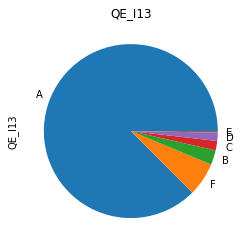

In [53]:
var_analisada= "QE_I13" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I13
A    40.963574
B    53.807908
C    51.339462
D    52.272620
E    55.291358
F    41.472631
Name: Notas, dtype: float64
Desvio de Notas QE_I13
A    14.043552
B    16.035928
C    15.529936
D    14.912373
E    17.173217
F    14.364352
Name: Notas, dtype: float64


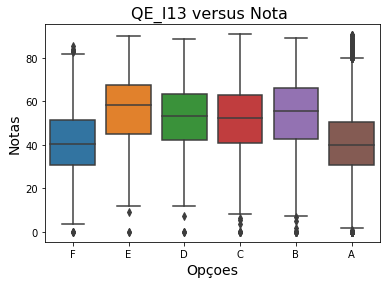

In [54]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    89571
F     1073
E      956
B      100
C       65
D       55
Name: QE_I14, dtype: int64


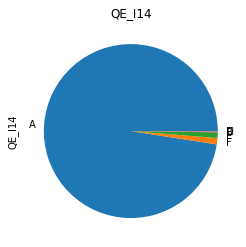

In [55]:
var_analisada= "QE_I14" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I14
A    41.562637
B    43.668817
C    49.633929
D    48.284615
E    50.535367
F    48.239370
Name: Notas, dtype: float64
Desvio de Notas QE_I14
A    14.382933
B    18.641229
C    16.295368
D    18.017653
E    16.061121
F    14.943492
Name: Notas, dtype: float64


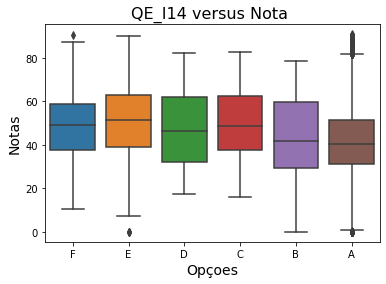

In [56]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    72120
D     6258
C     6218
E     3953
F     1722
B     1549
Name: QE_I15, dtype: int64


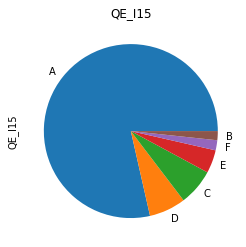

In [57]:
var_analisada= "QE_I15" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I15
A    41.368347
B    43.231464
C    39.924299
D    44.308407
E    48.093519
F    38.593484
Name: Notas, dtype: float64
Desvio de Notas QE_I15
A    14.453707
B    14.856861
C    13.732671
D    14.422351
E    14.129879
F    12.850293
Name: Notas, dtype: float64


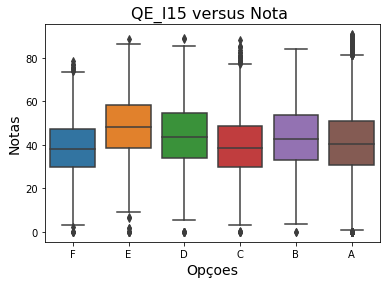

In [58]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

35.0    19220
31.0     9955
43.0     8424
41.0     8261
42.0     4715
33.0     4645
29.0     4317
26.0     3535
24.0     3116
15.0     2956
52.0     2194
32.0     2170
23.0     2159
22.0     2109
25.0     2106
51.0     1866
21.0     1845
12.0     1838
53.0     1477
27.0      934
13.0      829
11.0      701
50.0      571
17.0      525
28.0      491
99.0      347
16.0      335
14.0      179
Name: QE_I16, dtype: int64


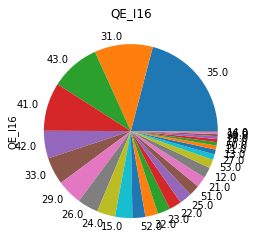

In [59]:
var_analisada= "QE_I16" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I16
11.0    40.150597
12.0    42.143724
13.0    38.118577
14.0    41.543114
15.0    39.621681
16.0    39.015361
17.0    35.699390
21.0    40.926085
22.0    39.326033
23.0    45.375948
24.0    42.233300
25.0    40.525172
26.0    40.382866
27.0    40.745126
28.0    47.622553
29.0    40.881501
31.0    43.928277
32.0    43.195539
33.0    45.044264
35.0    41.958807
41.0    41.421005
42.0    39.143324
43.0    41.597736
50.0    42.175919
51.0    38.656161
52.0    38.082652
53.0    46.152600
99.0    38.976667
Name: Notas, dtype: float64
Desvio de Notas QE_I16
11.0    13.905345
12.0    15.234837
13.0    12.931813
14.0    15.009252
15.0    14.011169
16.0    13.443976
17.0    11.976250
21.0    13.670707
22.0    13.871556
23.0    14.880871
24.0    14.672357
25.0    13.800517
26.0    14.288652
27.0    14.595894
28.0    15.914064
29.0    14.972924
31.0    15.005801
32.0    14.441141
33.0    15.209703
35.0    14.173235
41.0    14.100401
42.0    13.505845
43.0    13.810264
50.0    1

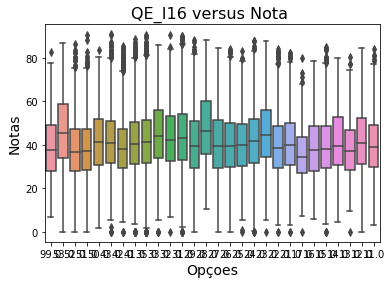

In [60]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    76768
B     7287
D     5268
C     1575
E      922
Name: QE_I18, dtype: int64


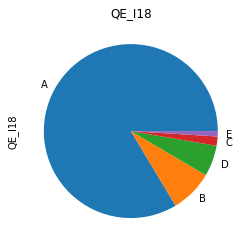

In [61]:
var_analisada= "QE_I18" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I18
A    41.902960
B    43.546343
C    39.818809
D    37.422680
E    41.715927
Name: Notas, dtype: float64
Desvio de Notas QE_I18
A    14.498017
B    14.640064
C    13.405326
D    13.193889
E    13.956904
Name: Notas, dtype: float64


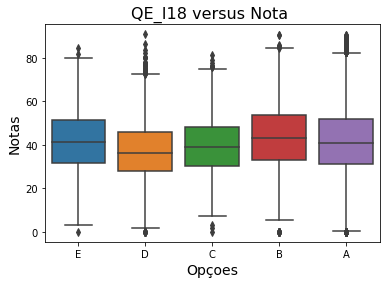

In [62]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

B    53747
A    18794
C     8469
F     5139
G     3557
D     1524
E      590
Name: QE_I19, dtype: int64


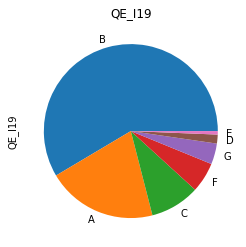

In [63]:
var_analisada= "QE_I19" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I19
A    40.861854
B    42.461236
C    40.604739
D    45.300560
E    43.923423
F    39.622391
G    39.308894
Name: Notas, dtype: float64
Desvio de Notas QE_I19
A    14.208173
B    14.705962
C    13.627787
D    15.591883
E    15.280818
F    13.623802
G    13.347359
Name: Notas, dtype: float64


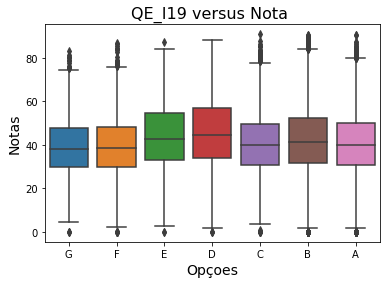

In [64]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

C    32527
A    28874
G     8623
K     6686
B     5657
H     3598
E     2047
J     1440
D     1417
F      511
I      440
Name: QE_I20, dtype: int64


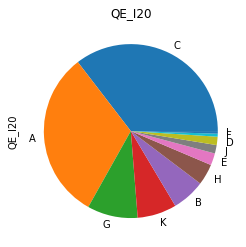

In [65]:
var_analisada= "QE_I20" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I20
A    41.404901
B    40.005783
C    42.121812
D    41.863267
E    40.688316
F    42.528157
G    43.575910
H    42.276863
I    42.148798
J    39.634967
K    40.782551
Name: Notas, dtype: float64
Desvio de Notas QE_I20
A    14.492791
B    13.959095
C    14.391825
D    14.493418
E    14.201253
F    14.569756
G    15.264148
H    14.537961
I    14.532586
J    13.539626
K    13.880943
Name: Notas, dtype: float64


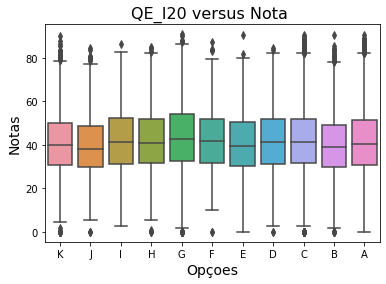

In [66]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    61348
B    30472
Name: QE_I21, dtype: int64


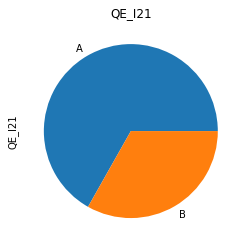

In [67]:
var_analisada= "QE_I21" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I21
A    42.701752
B    39.816844
Name: Notas, dtype: float64
Desvio de Notas QE_I21
A    14.764497
B    13.637532
Name: Notas, dtype: float64


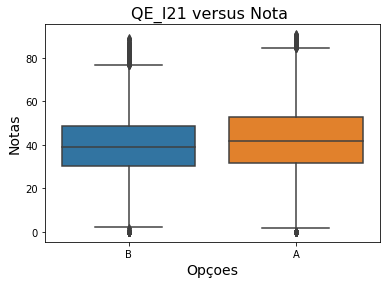

In [68]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

B    32447
C    26903
A    12612
E    11492
D     8366
Name: QE_I22, dtype: int64


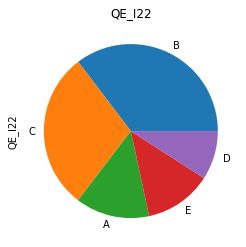

In [69]:
var_analisada= "QE_I22" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I22
A    40.347110
B    40.776802
C    42.347854
D    42.646185
E    43.887322
Name: Notas, dtype: float64
Desvio de Notas QE_I22
A    14.243275
B    14.086142
C    14.419069
D    14.646586
E    15.320725
Name: Notas, dtype: float64


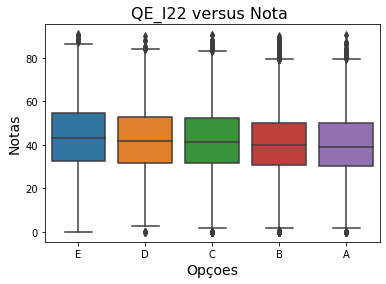

In [70]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

B    43255
C    24788
D     8916
E     7466
A     7395
Name: QE_I23, dtype: int64


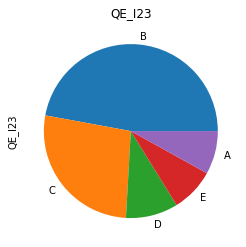

In [71]:
var_analisada= "QE_I23" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I23
A    39.469191
B    40.047018
C    42.983280
D    44.814276
E    45.846751
Name: Notas, dtype: float64
Desvio de Notas QE_I23
A    14.514778
B    13.785627
C    14.524502
D    14.864668
E    15.590604
Name: Notas, dtype: float64


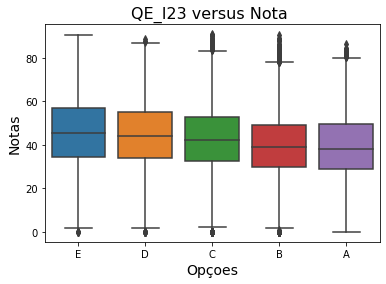

In [72]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

E    66281
A    16397
D     5693
C     2672
B      777
Name: QE_I24, dtype: int64


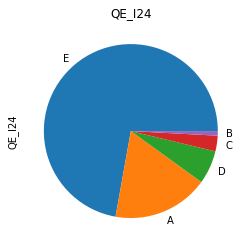

In [73]:
var_analisada= "QE_I24" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I24
A    44.719229
B    41.800819
C    48.193255
D    43.540404
E    40.594513
Name: Notas, dtype: float64
Desvio de Notas QE_I24
A    15.083372
B    14.575968
C    15.575900
D    14.298245
E    14.080328
Name: Notas, dtype: float64


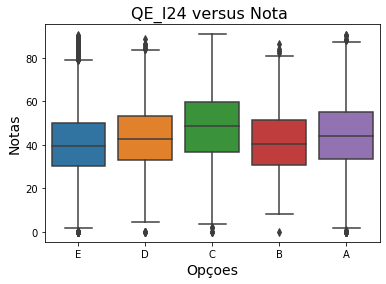

In [74]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

A    28614
E    22080
C    17011
H    14328
B     6331
F     1555
D     1235
G      666
Name: QE_I25, dtype: int64


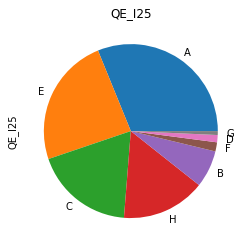

In [75]:
var_analisada= "QE_I25" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I25
A    40.025557
B    38.892909
C    39.886609
D    40.664267
E    45.607813
F    39.964341
G    45.287840
H    42.742639
Name: Notas, dtype: float64
Desvio de Notas QE_I25
A    13.642055
B    14.214958
C    13.541068
D    14.569602
E    15.022956
F    13.797177
G    15.856043
H    14.983357
Name: Notas, dtype: float64


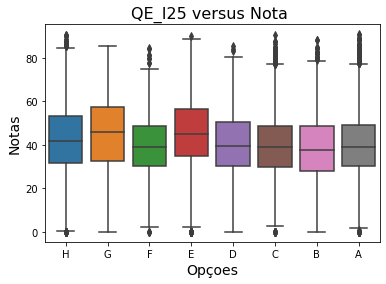

In [76]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

C    17215
A    10598
B    10167
E     6867
D     1617
Name: QE_I26, dtype: int64


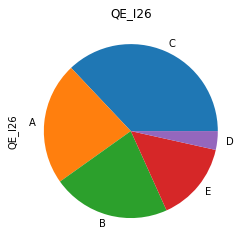

In [77]:
var_analisada= "QE_I26" # 


opcoes_escolhidas=df.loc[:,[var_analisada,"Notas"]]
qtd_alunos_por_categoria('Notas',var_analisada)

Media de Notas QE_I26
A    45.683183
B    37.335425
C    40.248745
D    39.106225
E    38.061391
Name: Notas, dtype: float64
Desvio de Notas QE_I26
A    15.291341
B    12.935554
C    13.840026
D    13.309865
E    13.173728
Name: Notas, dtype: float64


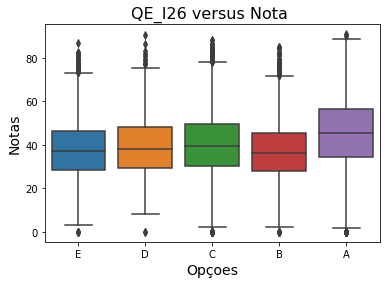

In [78]:
Media_e_desvio(var_analisada,opcoes_escolhidas)
notas_medias_na_variavel(var_analisada,opcoes_escolhidas)

### Desempenho dos estudantes de acordo com a faixa de idade

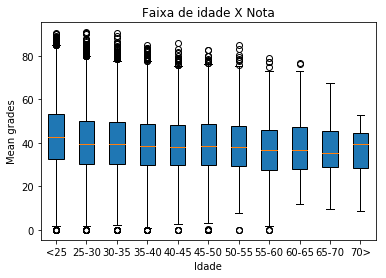

In [154]:
labels = ['<25','25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70>']
dados = []

#Sem retirar todos os NAN, o boxplot do Matplotlib não funciona
df_aux = df[df['Notas'].notna()]

#pega um sub dataset somente com as notas  
dados.append(df_aux.query('NU_IDADE <= 25')['Notas'])
dados.append(df_aux.query('NU_IDADE > 25 & NU_IDADE <=30')['Notas'])
dados.append(df_aux.query('NU_IDADE > 30 & NU_IDADE <=35')['Notas'])
dados.append(df_aux.query('NU_IDADE > 35 & NU_IDADE <=40')['Notas'])
dados.append(df_aux.query('NU_IDADE > 40 & NU_IDADE <=45')['Notas'])
dados.append(df_aux.query('NU_IDADE > 45 & NU_IDADE <=50')['Notas'])
dados.append(df_aux.query('NU_IDADE > 50 & NU_IDADE <=55')['Notas'])
dados.append(df_aux.query('NU_IDADE > 55 & NU_IDADE <=60')['Notas'])
dados.append(df_aux.query('NU_IDADE > 60 & NU_IDADE <=65')['Notas'])
dados.append(df_aux.query('NU_IDADE > 65 & NU_IDADE <=70')['Notas'])
dados.append(df_aux.query('NU_IDADE > 70')['Notas'])


plt.boxplot(dados,patch_artist=True, labels=labels)
plt.title('Faixa de idade X Nota')
plt.ylabel('Mean grades')
plt.xlabel('Idade')
plt.show()

### Desempenho durante a graduação de acordo com o questionario respondido

In [ ]:
#Média das notas em relação as opções escolhidas pelos alunos

var_media = 'Notas'
aux = 42 #Inicio dos questionarios sobre como se deu a graduação.
while True:
    var_grupo = 'QE_I'+ str(aux)
    group_1 = df[df[var_grupo] == 1]
    mean1 = group_1[var_media].mean()
    group_2 = df[df[var_grupo] == 2]
    mean2 = group_2[var_media].mean()
    group_3 = df[df[var_grupo] == 3]
    mean3 = group_3[var_media].mean()
    group_4 = df[df[var_grupo] == 4]
    mean4 = group_4[var_media].mean()
    group_5 = df[df[var_grupo] == 5]
    mean5 = group_5[var_media].mean()
    group_6 = df[df[var_grupo] == 6]
    mean6 = group_6[var_media].mean()
    group_7 = df[df[var_grupo] == 7]
    mean7 = group_7[var_media].mean()
    group_8 = df[df[var_grupo] == 8]
    mean8 = group_8[var_media].mean()
    names = [1,2,3,4,5,6,7,8]
    #names = ['1 -'+str(group_1['NU_ANO'].count()),
    #         ' 2 -'+str(group_2['NU_ANO'].count()),
    #         ' 3 -'+str(group_3['NU_ANO'].count()),
    #         ' 4 -'+str(group_4['NU_ANO'].count()),
    #         ' 5 -'+str(group_5['NU_ANO'].count()),
    #         ' 6 -'+str(group_6['NU_ANO'].count()),
    #         ' 7 -'+str(group_7['NU_ANO'].count()),
    #         ' 8 -'+str(group_8['NU_ANO'].count())]
    plt.bar(names,[mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8])
    plt.title('QE_I'+ str(aux)+ ' - conceito atribuido x media das notas')
    plt.ylabel('Mean grades')
    plt.xlabel('Chosen option')
    plt.savefig('DADOS_ENADE_2017/QE_I'+str(aux)+'.png', format='png')
    plt.show()
    if aux == 68:# 68 é a ultima questão do questionario
        break
    else:
        aux+=1

### Quantidade de alunos por área de enquadramaneto de curso 

In [ ]:
df.groupby('CO_GRUPO')['NU_ANO'].value_counts()

### Quantidade de alunos por sexo em área de enquadramaneto de curso

In [ ]:

df.groupby('CO_GRUPO')['TP_SEXO'].value_counts()

### Comparações com as escolaridades dos pais em todas as combinações possíveis em relação a nota do estudante
#### A = Nenhuma.
#### B = Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série).
#### C = Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série).
#### D = Ensino Médio.
#### E = Ensino Superior - Graduação.
#### F = Pós-graduação.

In [ ]:
array_father = ['A','B','C', 'D', 'E', 'F']
array_mather = ['A','B','C', 'D', 'E', 'F']
array_aux = []
for i in array_father:
    for j in array_mather:
        Estudo_dos_pais = df[(df['QE_I04'] == i) & (df['QE_I05'] == j)]
        grade = Estudo_dos_pais['Notas'].mean()
        array_aux.append(f' Mean students grades: {grade:.2f} - Father is: '+str(i)+' and Mother is: '+str(j))
        
        #print(f'Grade: {grade:.2f} - Father is: '+str(i)+' and Mother is: '+str(j))
ordenado = sorted(array_aux)
for i in ordenado:
    print(i)

#### Quando os pais juntos tem maior escolaridade, como por exemplo graduação e pós graduação, as notas dos estudantes são consideravelmente altas em relação ao estudantes que tem os pais com escolaridade mais baixa. 

### Desempenho dos estudantes que demoraram a ingressar X estudantes que ingressaram rápido na graduação

In [ ]:
# Estudantes que ingressaran rápido
# Esse processamento pode DEMORAR vários minutos. Fiz com dataset de 100.000 linhas

less_5years = df
for index, row in df.iterrows():
    if row['ANO_IN_GRAD'] - row['ANO_FIM_EM'] > 5:
        print(index, row['ANO_IN_GRAD'] - row['ANO_FIM_EM'])
        #print(index, row['NU_ANO'], row['CO_GRUPO'])
        less_5years = less_5years.drop(index)
less_5years.to_csv('entered_less_5years.csv')        


In [ ]:
# Estudantes demoraram a ingressar
# Esse processamento pode DEMORAR vários minutos Fiz com dataset de 100.000 linhas

over_5years = df
for index, row in df.iterrows():
    if row['ANO_IN_GRAD'] - row['ANO_FIM_EM'] <= 5:
        print(index, row['ANO_IN_GRAD'] - row['ANO_FIM_EM'])
        #print(index, row['NU_ANO'], row['CO_GRUPO'])
        over_5years = over_5years.drop(index)
over_5years.to_csv('entered_over_5years.csv')        

### lendo o dataset com estudantes que concluiram o ensino médio é ingressaram ATÉ 5 anos no ensino superior

In [ ]:
name_path_csv = "DADOS_ENADE_2018/entered_less_5years.csv"
arquivo = open(name_path_csv)
less_5years = pd.read_csv(arquivo, delimiter=",")
less_5years = less_5years.drop(['Unnamed: 0'], axis=1)
less_5years.head()

### lendo o dataset com estudantes que concluiram o ensino médio é ingressaram A MAIS DE 5 anos no ensino superior

In [ ]:
name_path_csv = "DADOS_ENADE_2018/entered_over_5years.csv"
arquivo = open(name_path_csv)
over_5years = pd.read_csv(arquivo, delimiter=",")
over_5years = over_5years.drop(['Unnamed: 0'], axis=1)
over_5years.head()

### Idade média dos estudantes que ingresaram em até 5 anos

In [ ]:
less_5years['NU_IDADE'].mean()

### Idade média dos estudantes que ingresaram a mais de 5 anos

In [ ]:
over_5years['NU_IDADE'].mean()

### Cria grafico de pizza duplo com a quantidade de alunos que ingraram a menos e a mais de 5 anos em determinada categoria 

In [ ]:
def qtd_estudantes_less_e_over(var_analisada):
    over_data = []
    less_data = []

    # Pega os indeces
    over_opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
    over_order = over_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index

    #somas os indeces e armazena em um array
    for i in over_order:
        total = over_5years[over_5years[var_analisada] == i]
        total = total[var_analisada].count()
        #print(str(i)+' '+str(total))
        over_data.append(total)
    
    #Mesmos passos de cima, mas com os dados dos estudande que ingressaram a menos de 5 anos
    less_opcoes_escolhidas=less_5years.loc[:,[var_analisada,"Notas"]]
    #print(less_opcoes_escolhidas[var_analisada].count())
    less_order = less_opcoes_escolhidas.groupby(by=[var_analisada])["Notas"].mean().iloc[::-1].index
    for i in less_order:
        total2 = less_5years[less_5years[var_analisada] == i]
        total2 = total2[var_analisada].count()
        #print(str(i)+' '+str(total2))
        less_data.append(total2)
    #print(over_order)
   
    fig = plt.figure()
    ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
    ax1.pie(over_data, labels=over_order, radius = 1.5)
    ax2 = fig.add_axes([.6, .0, .5, .5], aspect=1)
    ax2.pie(less_data, labels=less_order, radius = 1.5)
    ax1.set_title('Over 5 years\n\n', size='15')
    ax2.set_title('Less 5 years\n\n', size='15')
    plt.show()

### Cria boxplot das notas dos estudantes que ingressaram A MAIS de 5 anos em relação a alguma variável

In [ ]:
def over_notas_x_opcoes(var_analisada):
    opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
    bplot=sns.boxplot(x=var_analisada,y='Notas', data=opcoes_escolhidas,order=over_order)
    bplot.axes.set_title('Over 5 years - '+str(var_analisada)+" versus Nota ",fontsize=16)
    bplot.set_xlabel("Opçoes",fontsize=14)
    bplot.set_ylabel("Notas",fontsize=14)
    opcoes_escolhidas.head()


### Cria boxplot das notas dos estudantes que ingressaram A MENOS de 5 anos em relação a alguma variável

In [ ]:
def less_notas_x_opcoes(var_analisada):
    opcoes_escolhidas=over_5years.loc[:,[var_analisada,"Notas"]]
    bplot=sns.boxplot(x=var_analisada,y='Notas', data=opcoes_escolhidas,order=over_order)
    bplot.axes.set_title('Over 5 years - '+str(var_analisada)+" versus Nota ",fontsize=16)
    bplot.set_xlabel("Opçoes",fontsize=14)
    bplot.set_ylabel("Notas",fontsize=14)
    opcoes_escolhidas.head()

In [ ]:
var_analisada = 'QE_I04'
qtd_estudantes_less_e_over(var_analisada)

In [ ]:
over_notas_x_opcoes(var_analisada)

In [ ]:
less_notas_x_opcoes(var_analisada)